# Fitness Watch Data Analysis

Fitness Watch Data Analysis is a crucial tool for businesses in the health and wellness domain. By analyzing user data from fitness wearables, companies can understand user behaviour, offer personalized solutions, and contribute to improving users’ overall health and well-being.

Below is the process we can follow while working on the problem of Fitness Watch Data Analysis:
- Import watch data and ensure it's accuarate.
- Perform Exploratory Data Analysis.
- Create visual representations.

## Features

* Data
* Time
* Step Count
* Distance
* Energy Burned
* Flights Climbed
* Walking Double Support Percentage
* Walking Speed


## Importing Data

In [70]:
# Importing importnt librairse
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing data
data = pd.read_csv("Data/Apple-Fitness-Data.csv")

# Previewing the first 5 rows of the data
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


Next step is to check some informations about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


From the informations above we can see that there are no missing values in our data, also from the second column (Dtype) we can observe that except for the Date and Time columns all the data is numerical values.

## Exploratory data Analysis (EDA)

In order to start the EDA we'll first explore some statistical values about the data

In [9]:
data.describe()

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
std,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368
min,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000


Now let's move to the Step Count column, the best way to preview it is to use bar plot since it's changing day by day

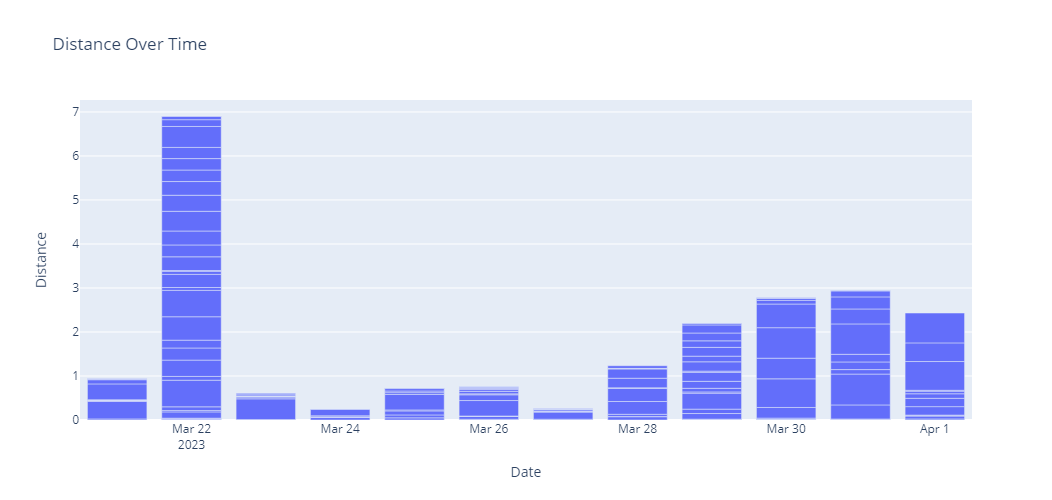

In [16]:
# Distance over time
fig = px.bar(data, x="Date",
              y="Distance",
              title="Distance Over Time",
              height=500)
fig.show()

We can see that the largest distance achieved is the 22nd Mar +10k step, so I'll expect high calories burned for that day.

Let's check the step count for that day

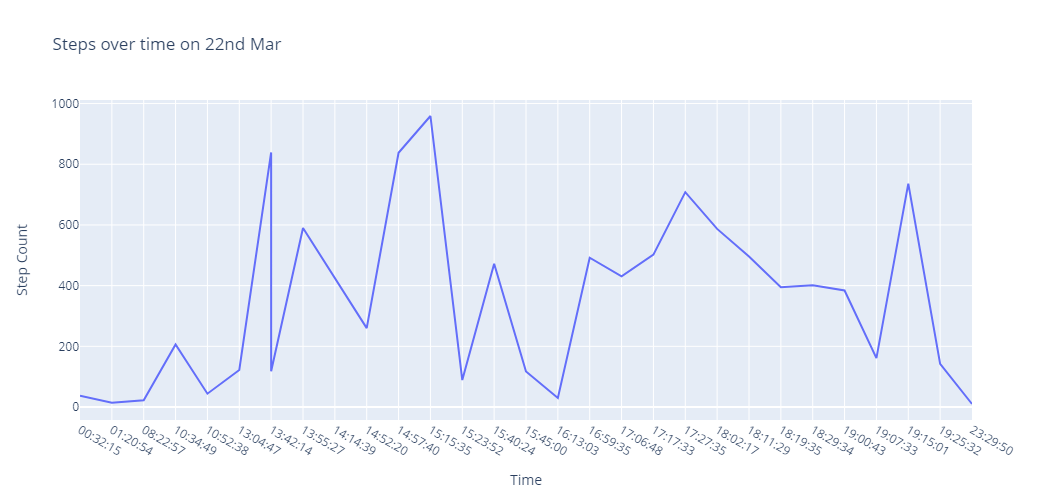

In [22]:
# Plotting the data just for the date of 22nd Mar
fig = px.line(data[data["Date"] == "2023-03-22"],
              x="Time",
              y="Step Count",
              title="Steps over time on 22nd Mar",
              height=500)
fig.show()

We can see that the biggest step count achieved was arround 15:00 pm

Now it's time to look at the energy burned all over time

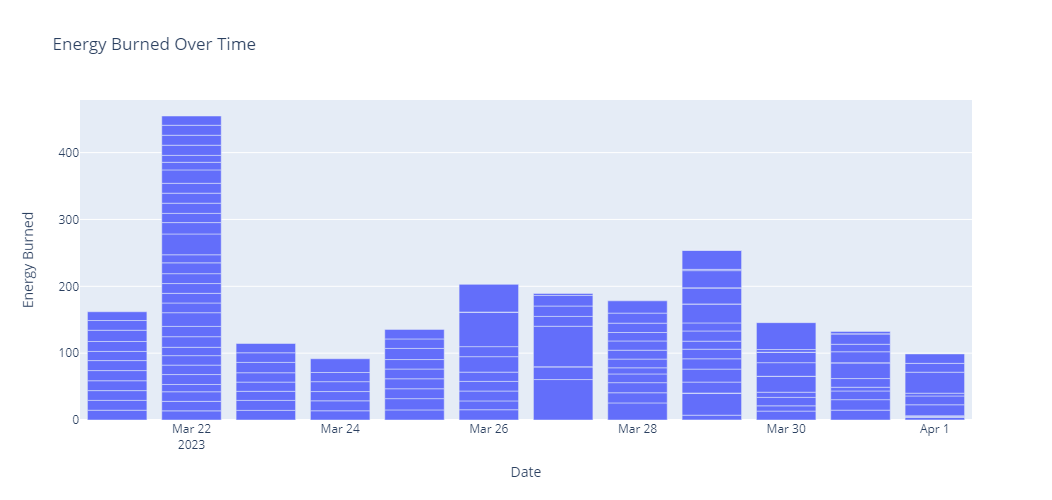

In [24]:
fig = px.bar(data,
             x="Date",
             y="Energy Burned",
             title="Energy Burned Over Time",
             height=500)
fig.show()

We can plot both distance and energy burned in the axis in order to be able to do a comparaison between them

In [55]:
grouped = data.groupby("Date", as_index=False).sum()

In [38]:
grouped.columns

Index(['Date', 'Time', 'Step Count', 'Distance', 'Energy Burned',
       'Flights Climbed', 'Walking Double Support Percentage',
       'Walking Speed'],
      dtype='object')

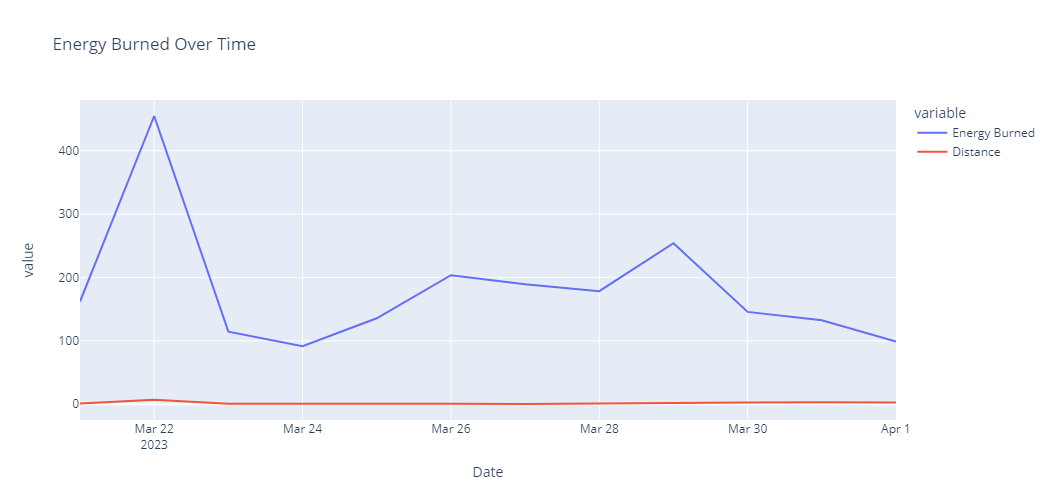

In [67]:
fig = px.line(grouped,
             x="Date",
             y=["Energy Burned", "Distance"],
             title="Energy Burned Over Time",
             height=500)
# fig.add_scatter(grouped,
#              x="Date",
#              y="Energy Burned",
#              title="Energy Burned Over Time",
#              height=500)
fig.show()

Now let's have a look at Walking speed over the time

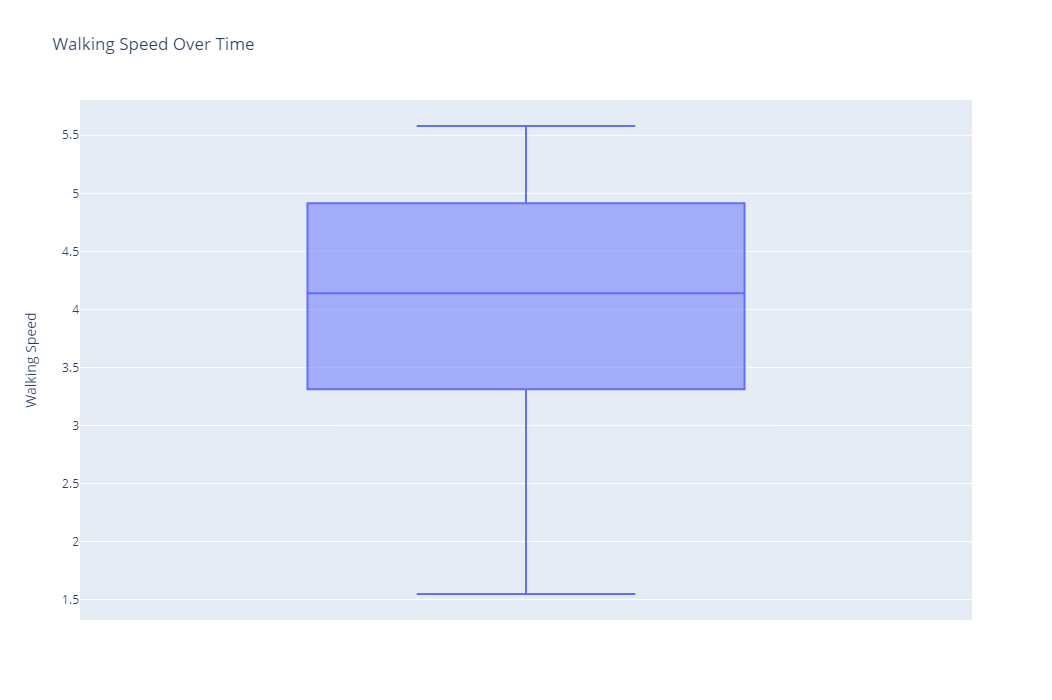

In [83]:
# Walking Speed Over Time
fig = px.box(data,
               y="Walking Speed",
               title="Walking Speed Over Time",
              height=700,
             width=500)
fig.show()

The walking speed is not changing in general the speed is arround 3.3 and 4.9 with a mean of 4.14

Now let's have a look at walking efficiency over time;
Walking efficiency is calculated by deviding the distance by step count

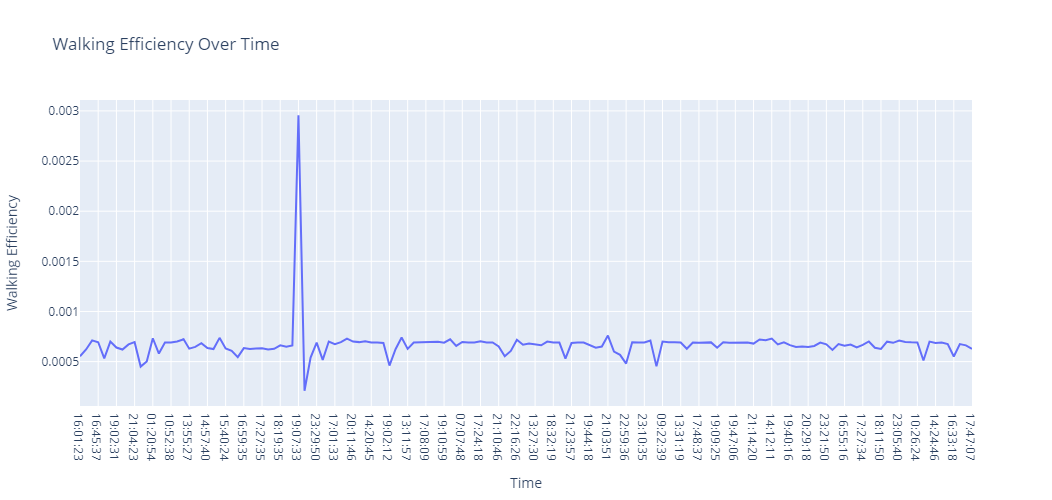

In [85]:
# Calculate Walking Efficiency
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

fig = px.line(data, x="Time",
               y="Walking Efficiency",
               title="Walking Efficiency Over Time",
              height=500)
fig.show()

In general cases it's stable 

In [102]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"],
                        right=False)

data["Time Interval"] = time_intervals

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14208\1113417134.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



d:\Projects\MachineLearning\Watch_Data\env\lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



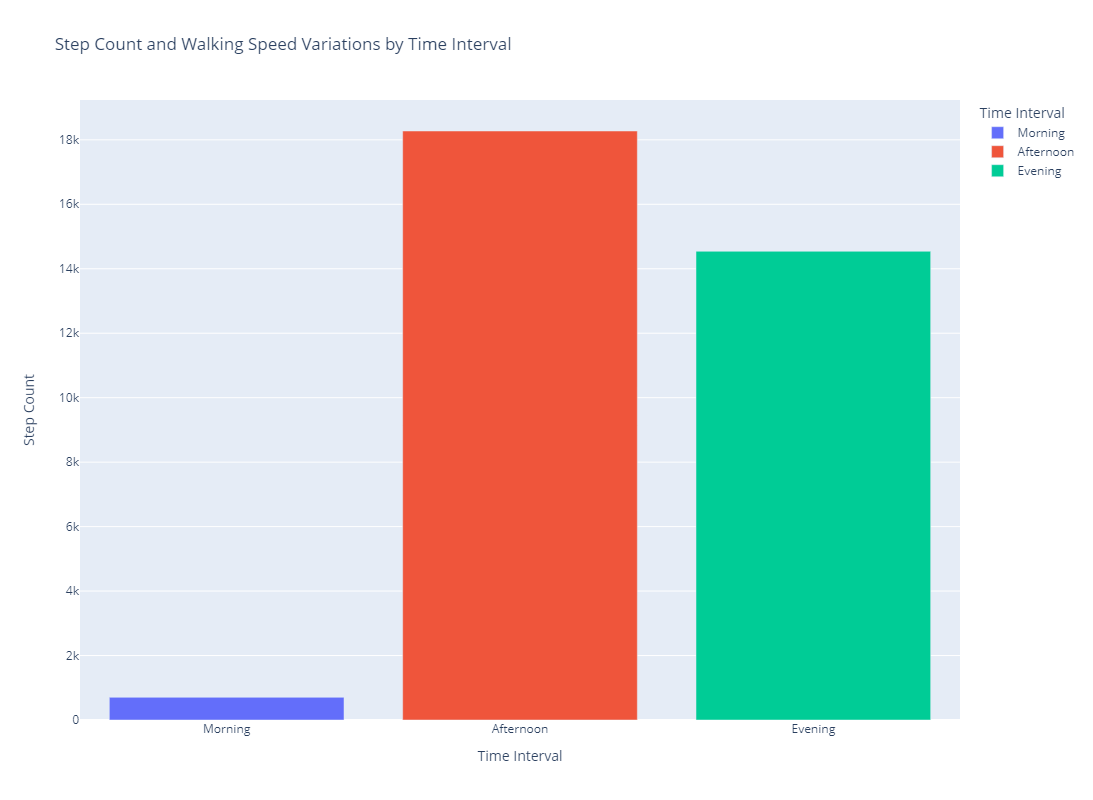

In [112]:
# Variations in Step Count and Walking Speed by Time Interval
fig = px.bar(data.groupby("Time Interval", as_index=False, observed=True).sum(), 
             x="Time Interval",
             y="Step Count",
             color="Time Interval",
             title="Step Count and Walking Speed Variations by Time Interval",
             height=800,
             width=800)
fig.show()

We can see that the most walks happens afternoon and evening

Now, let’s compare the daily average of all the health and fitness metrics:

In [134]:
# Reshape data for treemap
daily_avg_metrics = data.groupby("Date")
# daily_avg_metrics.select_dtypes(include='number').mean()
pd.DataFrame()

AttributeError: 'DataFrameGroupBy' object has no attribute 'select_dtypes'

In [118]:
# Reshape data for treemap
daily_avg_metrics = pd.DataFrame(data.groupby("Date", as_index=False))
daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], 
                                                  value_vars=["Step Count", "Distance", 
                                                              "Energy Burned", "Flights Climbed", 
                                                              "Walking Double Support Percentage", 
                                                              "Walking Speed"])

# Treemap of Daily Averages for Different Metrics Over Several Weeks
fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics")
fig.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Date']"